# Analysis - Congressional Fundraising and Votes

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [56]:
candidate_data = pd.read_csv('candidates.csv', header = None)
candidate_data.columns = ['candidate', 'year', 'district', 'raised', 'votes', 'party', 'district_raised']
candidate_data['percent_raised'] = candidate_data['raised'] / candidate_data['district_raised']
candidate_data.head()

,candidate,year,district,raised,votes,party,district_raised,percent_raised
0,Bradley Byrne,2016,AL01,1366370,0.0,R,1366370,1.000000
1,Martha Roby,2016,AL02,1381821,48.8,R,1381821,1.000000
2,Mike D Rogers,2016,AL03,1137285,0.0,R,1147095,0.991448
3,Jesse Smith,2016,AL03,9810,32.9,D,1147095,0.008552
4,Robert B Aderholt,2016,AL04,1433641,0.0,R,1433641,1.000000


#### Clean Data

In [57]:
#remove rows without voting data
cleaned_data = candidate_data[candidate_data.votes > 0.01]
#d = d[d[:,1] != 0]

#remove rows with highly imbalanced funding
cleaned_data = cleaned_data[cleaned_data.percent_raised > 0.001]
cleaned_data = cleaned_data[cleaned_data.percent_raised < 0.999]
cleaned_data.reset_index(drop=True, inplace=True)
#x, y, p, z = d[:,0], d[:,1], d[:,2], d[:,3]
cleaned_data.head()

,candidate,year,district,raised,votes,party,district_raised,percent_raised
0,Jesse Smith,2016,AL03,9810,32.9,D,1147095,0.008552
1,Mo Brooks,2016,AL05,475500,66.7,R,536622,0.886099
2,Will Boyd,2016,AL05,61122,33.2,D,536622,0.113901
3,Gary Palmer,2016,AL06,1201855,74.5,R,1286834,0.933963
4,David Putman,2016,AL06,84979,25.4,D,1286834,0.066037


### Graphing

#### Basic Trend

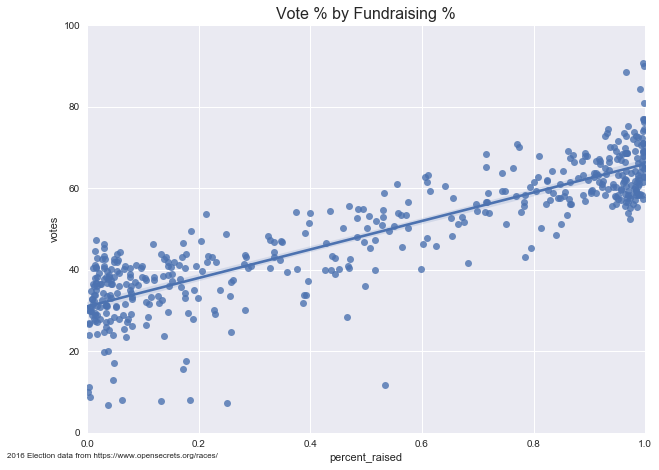

In [58]:
plt.figure(figsize=(10, 7.5))

#plot linear regression
plt.ylim(0, 100)
plt.xlim(0, 1)
sns.regplot(cleaned_data.percent_raised, cleaned_data.votes, scatter = True, robust = False, n_boot = 100)

#add text
plt.title('Vote % by Fundraising %', fontsize=16)
plt.annotate('2016 Election data from https://www.opensecrets.org/races/', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

#### Points shaded by amount raised

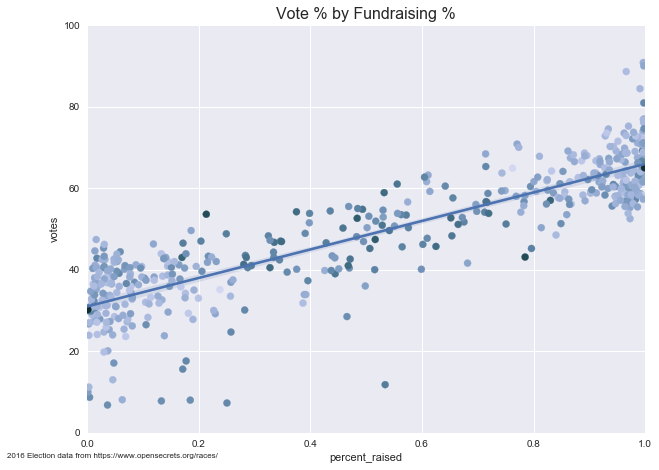

In [63]:
plt.figure(figsize=(10, 7.5))

#plot linear regression
plt.ylim(0, 100)
plt.xlim(0, 1)
sns.regplot(cleaned_data.percent_raised, cleaned_data.votes, scatter = False, robust = False, n_boot = 100)

#shade points by amount raised (darker = more)
#scale z to 1
totals = cleaned_data.district_raised / max(cleaned_data.district_raised)
totals_curved = totals ** .33
cmap = sns.cubehelix_palette(start = 2.4, rot = .2, as_cmap=True)
plt.scatter(cleaned_data.percent_raised, cleaned_data.votes, c=totals_curved, s=50, cmap=cmap)

#add text
plt.title('Vote % by Fundraising %', fontsize=16)
plt.annotate('2016 Election data from https://www.opensecrets.org/races/', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

#### Points colored by party

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
439    True
440    True
441    True
442    True
443    True
444    True
445    True
446    True
447    True
448    True
449    True
450    True
451    True
452    True
453    True
454    True
455    True
456    True
457    True
458    True
459    True
460    True
461    True
462    True
463    True
464    True
465    True
466    True
467    True
468    True
Name: party, Length: 469, dtype: bool


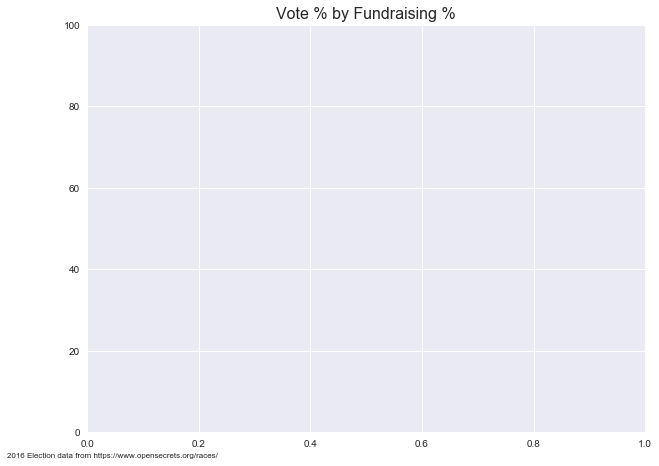

In [75]:
plt.figure(figsize=(10, 7.5))
#plt.annotate(fit[0][1], (0,0), (-80,-20), fontsize=8)
#plot linear regression
plt.ylim(0, 100)
plt.xlim(0, 1)
p = cleaned_data.party
print(p.astype(str) == p)
plt.scatter(cleaned_data.percent_raised[p == 'D'], cleaned_data.votes[p == 'D'], c=totals_curved[p == 'D'], s=50, cmap='Blues')
plt.scatter(cleaned_data.percent_raised[p == 0.0], cleaned_data.votes[p == 0.0], c=totals_curved[p == 0.0], s=50, cmap='Reds')
plt.scatter(cleaned_data.percent_raised[p == 0.5], cleaned_data.votes[p == 0.5], c=totals_curved[p == 0.5], s=50, cmap='Greens')
#plt.Axes.set_xlabel('xlabel')
#plt.Axes.set_ylabel('ylabel')
#add text
plt.title('Vote % by Fundraising %', fontsize=16)
plt.annotate('2016 Election data from https://www.opensecrets.org/races/', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
#fucntion to output difference between two polyfits
def diff(d1, d2):
    f1 = np.polyfit(d1[0], d1[1], 1)
    f2 = np.polyfit(d2[0], d2[1], 1)
    return (abs(f1 - f2) / (sum(f1, f2) / 2)), f1, f2

As you can see, the data is pretty consistent between D and R (the lines overlap so much you can't differentiate), however, there is not enough data for third-party candidates

In [ ]:
sns.regplot(x[p == 1.0], y[p == 1.0], scatter = False, robust = False, n_boot = 100, ci = None, color='b')
sns.regplot(x[p == 0.0], y[p == 0.0], scatter = False, robust = False, n_boot = 100, ci = None, color='r')
#sns.regplot(x[p == 0.5], y[p == 0.5], scatter = False, robust = False, n_boot = 100, ci = None, color='g')
plt.ylim(0, 100)
plt.xlim(0, 1)
plt.scatter(x[p == 1.0], y[p == 1.0], c=z2[p == 1.0], s=50, cmap='Blues')
plt.scatter(x[p == 0.0], y[p == 0.0], c=z2[p == 0.0], s=50, cmap='Reds')
plt.scatter(x[p == 0.5], y[p == 0.5], c=z2[p == 0.5], s=50, cmap='Greens')
print('% difference between D and R regression: ')
print(diff([x[p == 1.0], y[p == 1.0]], [x[p == 0.0], y[p == 0.0]])[0] * 100)

### Misc Analysis

In [ ]:
s = x[y > 50]
print(s.mean())
print(x.mean())
low, high = 30, 70
x_trim = [x[i] for i in range(len(x)) if low < y[i] < high]
y_trim = [y[i] for i in range(len(y)) if low < y[i] < high]
d, f_trim, f_full = diff([x_trim, y_trim], [cleaned_data.percent_raised, y])
d

In [ ]:
from scipy.stats import kendalltau
sns.jointplot(cleaned_data.percent_raised, cleaned_data.votes, kind="kde", stat_func=kendalltau, color="#4CB391")